# Exploration of transit cost data

Through this notebook I hope to
1. Clean the excel file into a usable data set.
2. Run some descriptive statistics to understand the data set.

In [2]:
import pandas as pd
transitcost = pd.read_excel("transitcost.xlsx")
transitcost.head()
transitcost.columns = [x.lower() for x in transitcost.columns.tolist()]
transitcost.describe()

,id,rr?,year,ppp rate,real cost,cost/km (millions),cheap?,clength,ctunnel,anglo?,inflation index,real cost (2021 dollars),cost/km (2021 dollars)
count,637.000000,942.000000,906.000000,897.000000,8.920000e+02,886.000000,910.000000,910.000000,910.000000,910.000000,901.000000,8.950000e+02,886.000000
mean,7996.470958,0.079618,2015.346578,0.563132,2.067299e+04,213.383675,0.137363,1.771012,1.319968,0.054945,1.171605,1.278689e+04,242.622946
std,845.990262,0.270844,7.228181,0.730728,1.887423e+05,226.822287,0.344419,7.138749,5.262134,0.227998,0.451405,1.720297e+05,256.386639
min,7136.000000,0.000000,1965.000000,0.000064,4.603200e+01,0.150384,0.000000,0.000000,0.000000,0.000000,1.000000,7.980209e+01,10.812639
25%,7451.000000,0.000000,2013.000000,0.238000,1.419175e+03,126.976207,0.000000,0.000000,0.000000,0.000000,1.046980,1.543174e+03,144.249394
50%,7770.000000,0.000000,2017.000000,0.239000,3.148470e+03,168.326398,0.000000,0.000000,0.000000,0.000000,1.105459,3.413063e+03,188.332241
75%,8090.000000,0.000000,2020.000000,0.680000,5.413042e+03,223.681069,0.000000,0.000000,0.000000,0.000000,1.163176,5.935135e+03,249.281444
max,11270.000000,1.000000,2027.000000,5.000000,3.716565e+06,3928.571429,1.000000,83.100000,71.000000,1.000000,8.602222,4.179117e+06,4491.344503


In [9]:
df = transitcost[['id', 'length',
                'cost/km (millions)',
                'cheap?',
                "clength",
                "ctunnel",
                "anglo?",
                "inflation index",
                "real cost (2021 dollars)"]]
df.head()

,id,length,cost/km (millions),cheap?,clength,ctunnel,anglo?,inflation index,real cost (2021 dollars)
0,9501.0,7.5,68.000000,1.0,7.5,7.5,0.0,1.079102,550.341886
1,7136.0,5.7,417.052632,0.0,0.0,0.0,1.0,1.079102,2565.240650
2,7137.0,8.6,301.395349,0.0,0.0,0.0,1.0,1.163176,3014.952287
3,7138.0,7.8,592.307692,0.0,0.0,0.0,1.0,1.079102,4985.450027
4,7139.0,15.5,464.601290,0.0,0.0,0.0,1.0,1.059897,7632.655004


In [10]:
df.info()
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        637 non-null    float64
 1   length                    953 non-null    object 
 2   cost/km (millions)        886 non-null    float64
 3   cheap?                    910 non-null    float64
 4   clength                   910 non-null    float64
 5   ctunnel                   910 non-null    float64
 6   anglo?                    910 non-null    float64
 7   inflation index           901 non-null    float64
 8   real cost (2021 dollars)  895 non-null    float64
dtypes: float64(8), object(1)
memory usage: 68.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 636
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                 

In [16]:
df.id = df.id.astype('object')
df.length = df.length.astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 636
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        616 non-null    object 
 1   length                    616 non-null    float64
 2   cost/km (millions)        616 non-null    float64
 3   cheap?                    616 non-null    float64
 4   clength                   616 non-null    float64
 5   ctunnel                   616 non-null    float64
 6   anglo?                    616 non-null    float64
 7   inflation index           616 non-null    float64
 8   real cost (2021 dollars)  616 non-null    float64
dtypes: float64(8), object(1)
memory usage: 48.1+ KB


In [17]:
df.to_csv('sampleData.csv')

<AxesSubplot:xlabel='length', ylabel='clength'>

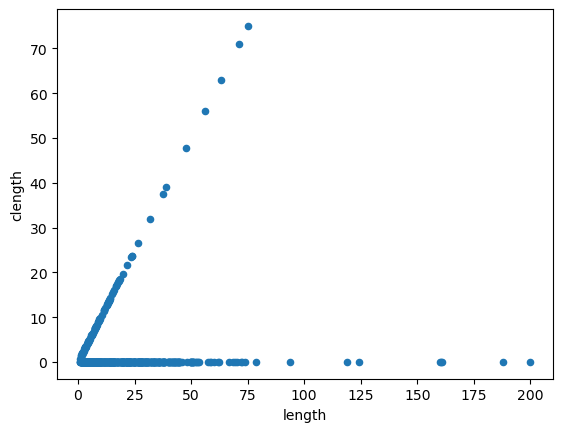

In [4]:
import matplotlib.pyplot as plt
df.plot.scatter(x='length', y='clength')
plt.show()

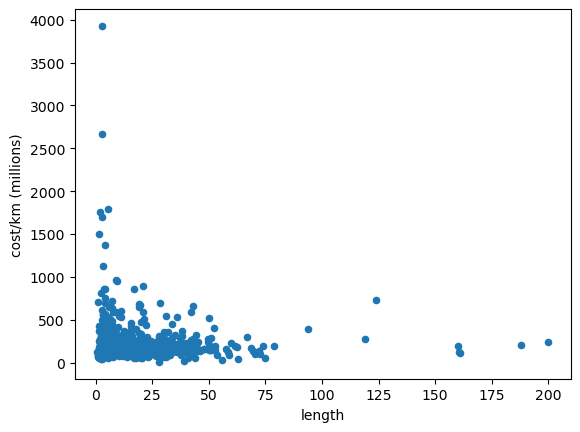

In [12]:
df.plot.scatter(x='length', y='cost/km (millions)')
plt.show()

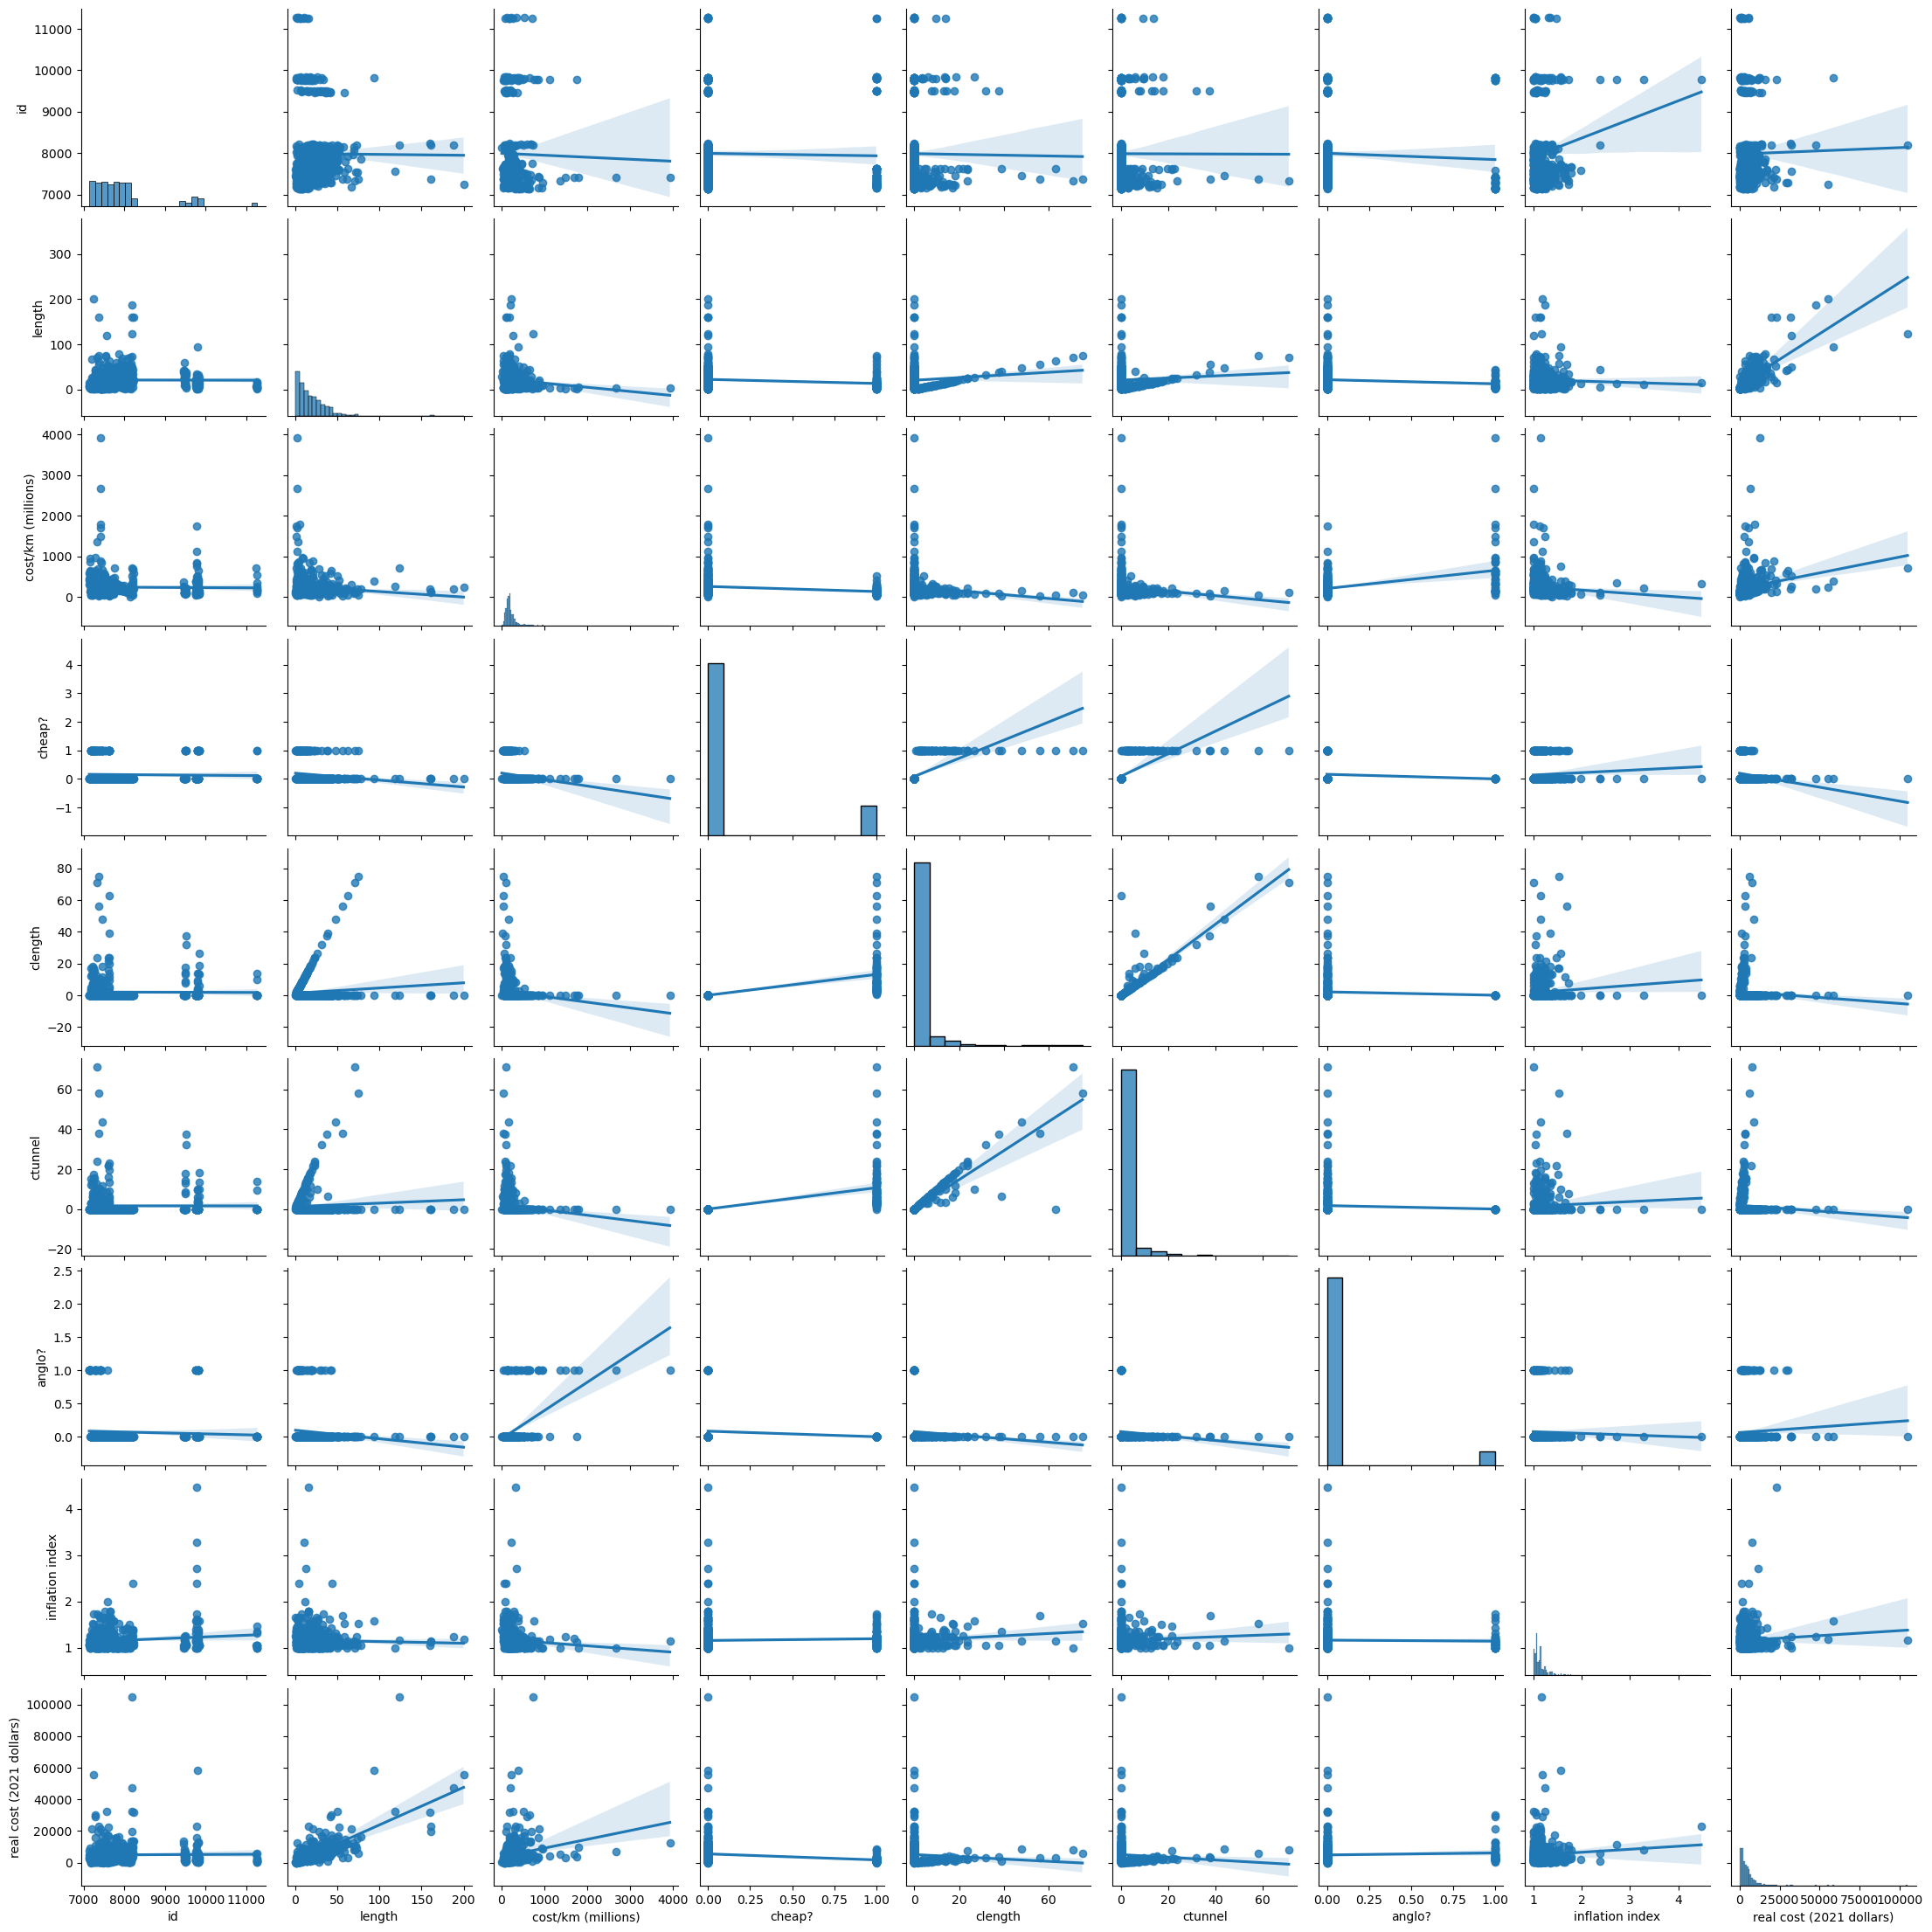

In [25]:
#scatter plot
import seaborn as sns
# cols_to_plot = [col for col in df.columns if '_pc' in col]

# cols_to_plot = ['length',
#                 'cost/km (millions)',
#                 'cheap?',
#                 'clength',
                # 'ctunnel']

# # remove those we don't want
# cols_to_plot.remove('14_pc_yes') 
# cols_to_plot.remove('23_pc_yes') 
# cols_to_plot.remove('24_pc_yes') 

# kind='reg' adds the line of best fit
ax = sns.pairplot(df, kind='reg') 
plt.show()

In [22]:
df.length=df.length.astype('float64')

In [ ]:
sns.pairplot(transitcost[cols_to_plot], kind='reg') 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 616 entries, 0 to 636
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        616 non-null    float64
 1   length                    616 non-null    float64
 2   cost/km (millions)        616 non-null    float64
 3   cheap?                    616 non-null    float64
 4   clength                   616 non-null    float64
 5   ctunnel                   616 non-null    float64
 6   anglo?                    616 non-null    float64
 7   inflation index           616 non-null    float64
 8   real cost (2021 dollars)  616 non-null    float64
dtypes: float64(9)
memory usage: 48.1 KB


## Standardising Data

In [26]:
# see https://scikit-learn.org/stable/modules/preprocessing.html for standardization
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(df)

# as in the previous lecture, 
# the scaler returns a numpy array, so we cast this as a DataFrame 
# and need to specify the column names and index
df_scaled = pd.DataFrame(scaler.transform(df), 
                         columns=df.columns, index=df.index)

In [58]:
# clustering
from sklearn.cluster import KMeans

# Drop NaN
df_scaled = df_scaled.dropna()
kmeans = KMeans(n_clusters=6, random_state=1).fit(df_scaled)
print(kmeans)

KMeans(n_clusters=6, random_state=1)


In [55]:
kmeans.cluster_centers_

array([[ 5.44495337e-02, -5.73532976e-03, -8.29680107e-02,
        -3.60073193e-01, -2.48706873e-01, -2.49836240e-01,
        -2.77350098e-01, -1.05801332e-01, -4.32815730e-02,
         1.18907563e+00],
       [ 4.98180457e-02,  1.55706242e+00, -5.94549365e-01,
         2.38655655e+00,  7.28266662e+00,  6.57359182e+00,
        -2.77350098e-01,  2.84884256e-01,  2.78352059e-02,
         6.00000000e+00],
       [ 1.31575120e-01,  5.98294396e+00,  1.53018072e-01,
        -4.19013746e-01, -2.70672701e-01, -2.72400391e-01,
        -2.77350098e-01,  9.30850227e-02,  5.93456452e+00,
         5.00000000e+00],
       [-2.75883205e-01, -4.75495182e-01, -4.06123651e-01,
         2.21120841e+00,  1.02189323e+00,  1.09180160e+00,
        -2.77350098e-01,  6.42570624e-01, -4.27824150e-01,
         4.18750000e+00],
       [-1.16636643e-01, -3.99852380e-01,  1.66489703e+00,
        -4.19013746e-01, -2.70672701e-01, -2.72400391e-01,
         3.51926458e+00, -8.40685770e-02,  1.59035515e-01,
         3.

In [59]:
df_scaled['cluster_id'] = kmeans.labels_

In [60]:
# verify that we got the same result as before
df_scaled.groupby('cluster_id').size()

cluster_id
0     66
1    415
2      7
3      8
4     45
5     75
dtype: int64

LinAlgError: singular matrix

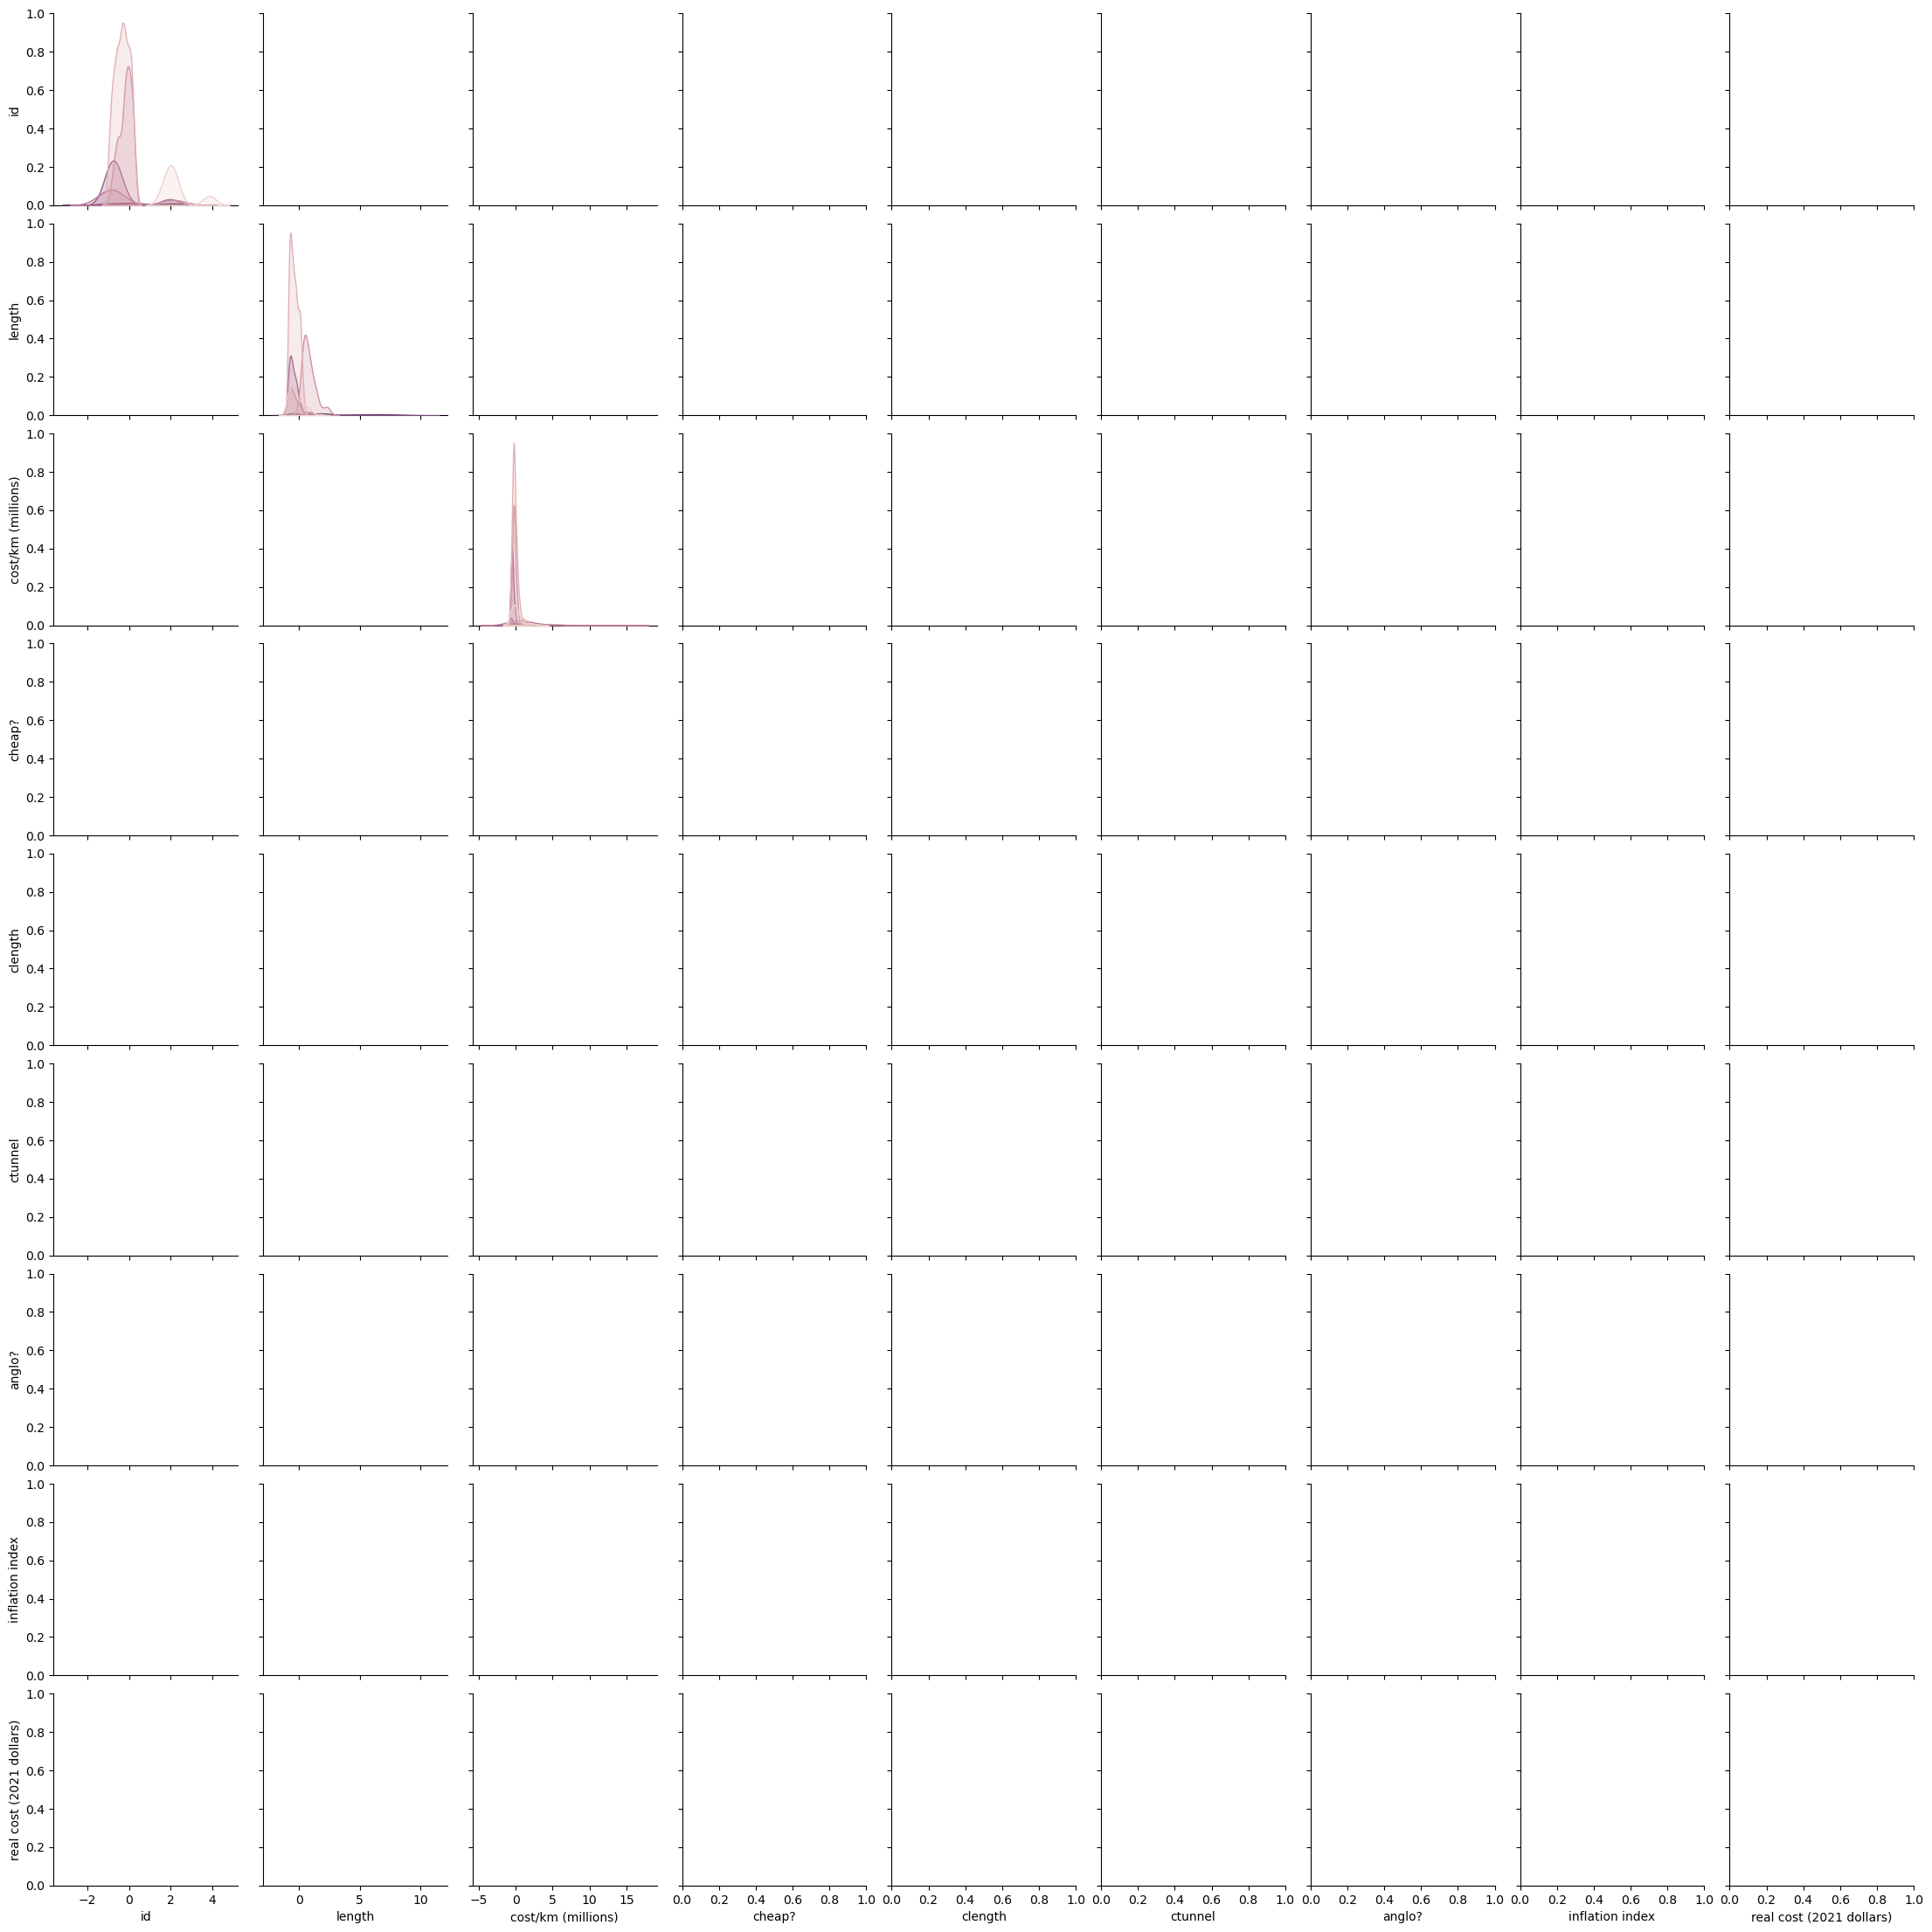

In [51]:
ax = sns.pairplot(df_scaled, hue='cluster_id', )

In [ ]:
# code from https://matplotlib.org/stable/gallery/specialty_plots/radar_chart.html
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarAxes(PolarAxes):

        name = 'radar'
        # use 1 line segment to connect specified points
        RESOLUTION = 1

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

In [52]:
def radar_plot(kmeans, df_scaled):
    N  = kmeans.cluster_centers_.shape[1]  # number of columns / variables
    k = kmeans.n_clusters
    theta = radar_factory(N, frame='polygon')
    data = kmeans.cluster_centers_.T  # the T means transpose
    spoke_labels = [col for col in df_scaled.columns if col!='cluster_id']
    fig, ax = plt.subplots(figsize=(4, 4),
                                subplot_kw=dict(projection='radar'))
    fig.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)

    ax.plot(theta, data) #, color=color)
    ax.set_varlabels(spoke_labels)

    # add legend relative to top-left plot
    labels = ['Cluster {}'.format(kk) for kk in range(k)]
    ax.legend(labels, loc=(0.95, .95),
                                labelspacing=0.1, fontsize=7)

ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of ticklabels (9).

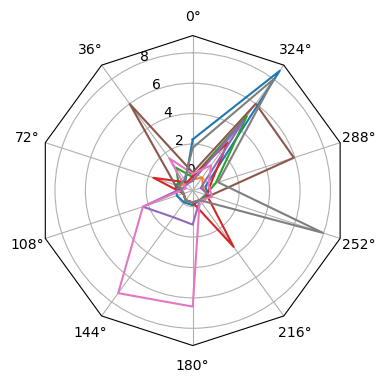

In [53]:
radar_plot(kmeans, df_scaled)

In [ ]:
cluster_id
0      8
1      7
2     85
3    471
4     45
dtype: int64